In [2]:
import numpy as np
import pandas as pd

# PART I. TRAIN SET

In [3]:
titanic = pd.read_csv('datasets/titanic/train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature stage

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing vals imputation

In [6]:
mv_cols = (titanic.isnull().sum())
print(mv_cols[mv_cols > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [5]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [6]:
titanic['Cabin'] = titanic['Cabin'].fillna('NA')

In [7]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [8]:
mv_cols = (titanic.isnull().sum())
print(mv_cols[mv_cols > 0])

Series([], dtype: int64)


### Basic feat engineering

In [9]:
titanic['Has_cabin'] = titanic['Cabin'].apply(lambda x: 0 if x == 'NA' else 1)

In [10]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [11]:
titanic['Is_alone'] = titanic['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

In [19]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
figsize=(10,5)

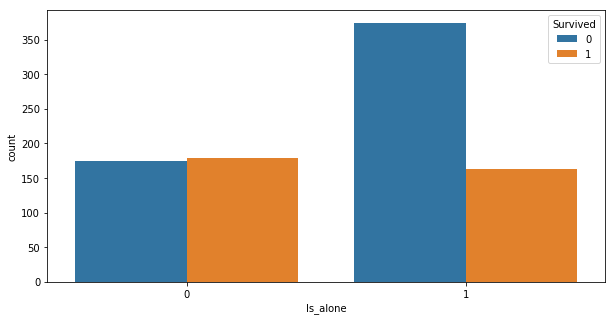

In [22]:
plt.figure(figsize=figsize)
sns.countplot(x='Is_alone', hue='Survived', data=titanic)
plt.show()

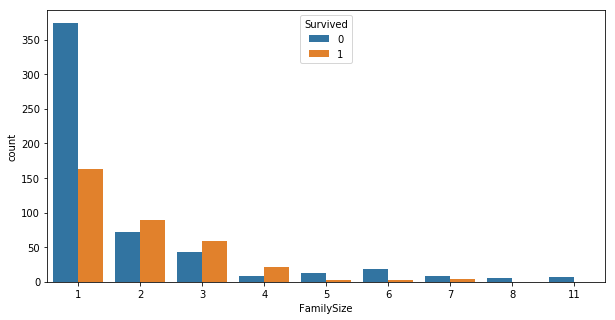

In [23]:
plt.figure(figsize=figsize)
sns.countplot(x='FamilySize', hue='Survived', data=titanic)
plt.show()

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize,Is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,1,1


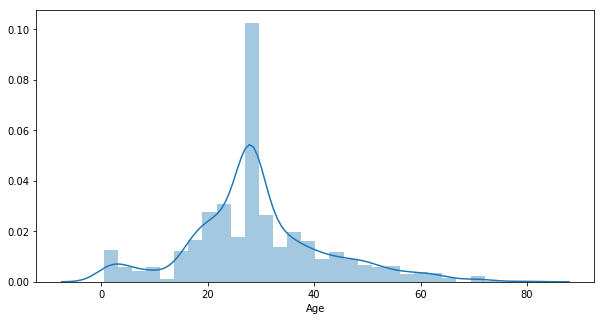

In [25]:
plt.figure(figsize=figsize)
sns.distplot(titanic['Age'])
plt.show()

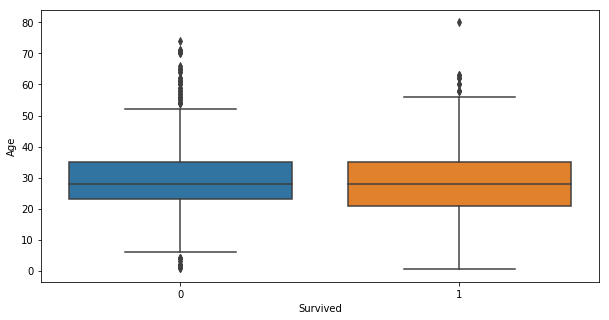

In [27]:
plt.figure(figsize=figsize)
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()
#### presence of outliers!

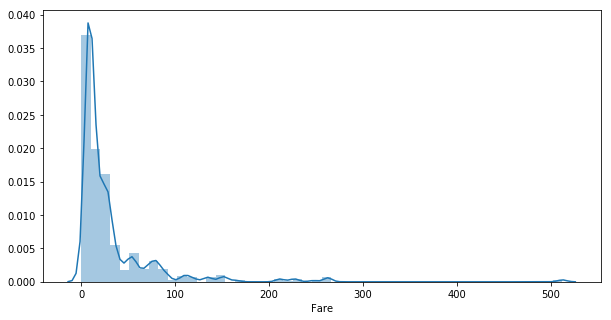

In [26]:
plt.figure(figsize=figsize)
sns.distplot(titanic['Fare'])
plt.show()

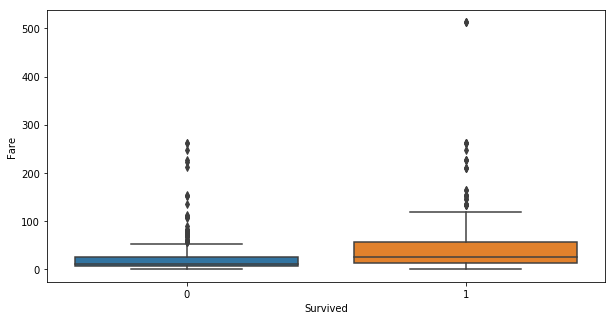

In [28]:
plt.figure(figsize=figsize)
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.show()
#### also presence of outliers! :-/

In [13]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer

In [14]:
ageScaler = RobustScaler()
titanic['Age_scaled'] = ageScaler.fit_transform(titanic['Age'].values.reshape(-1, 1))

In [15]:
fareScaler = PowerTransformer()
titanic['Fare_scaled'] = fareScaler.fit_transform(titanic['Fare'].values.reshape(-1, 1))

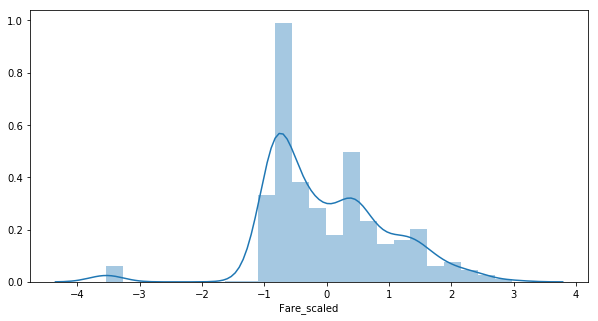

In [40]:
plt.figure(figsize=figsize)
sns.distplot(titanic['Fare_scaled'])
plt.show()

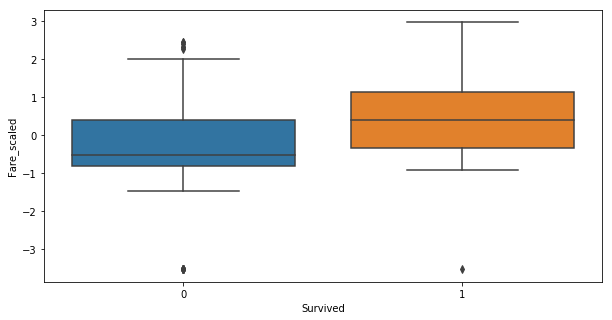

In [41]:
plt.figure(figsize=figsize)
sns.boxplot(x='Survived', y='Fare_scaled', data=titanic)
plt.show()

In [16]:
unnecessary_cols = ['PassengerId','Name','Ticket','Cabin','SibSp','Parch', 'Age', 'Fare']
titanic.drop(unnecessary_cols, inplace=True, axis=1)

In [17]:
titanic = pd.get_dummies(titanic)

In [18]:
titanic.head()

,Survived,Pclass,Has_cabin,FamilySize,Is_alone,Age_scaled,Fare_scaled,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,2,0,-0.461538,-0.878820,0,1,0,0,1
1,1,1,1,2,0,0.769231,1.336651,1,0,1,0,0
2,1,3,0,1,1,-0.153846,-0.790065,1,0,0,0,1
3,1,1,1,2,0,0.538462,1.067352,1,0,0,0,1
4,0,3,0,1,1,0.538462,-0.774439,0,1,0,0,1


## Modelling

In [19]:
titanic.to_csv('datasets/titanic/preTraining,csv')

In [20]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [22]:
kFold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [30]:
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print('Fold:', i)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    modelLR = LogisticRegression(random_state=0)
    
    modelLR.fit(X_train, y_train)
    preds = modelLR.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    accs.append(acc)
    f1s.append(f1)
    print('Acc:', acc, 'F1:', f1)
    print()
print('Mean acc:', np.mean(accs))
print('Mean F1:', np.mean(f1s))

Fold: 0
Acc: 0.8444444444444444 F1: 0.8055555555555555

Fold: 1
Acc: 0.8426966292134831 F1: 0.787878787878788

Fold: 2
Acc: 0.8202247191011236 F1: 0.7714285714285715

Fold: 3
Acc: 0.8764044943820225 F1: 0.8307692307692308

Fold: 4
Acc: 0.797752808988764 F1: 0.735294117647059

Fold: 5
Acc: 0.7640449438202247 F1: 0.6865671641791046

Fold: 6
Acc: 0.7191011235955056 F1: 0.6268656716417911

Fold: 7
Acc: 0.797752808988764 F1: 0.71875

Fold: 8
Acc: 0.7528089887640449 F1: 0.6451612903225806

Fold: 9
Acc: 0.7865168539325843 F1: 0.7397260273972601

Mean acc: 0.8001747815230962
Mean F1: 0.7347996416819941


#### Get preds for whole dataset to stack later ;)

In [34]:
predsLR = modelLR.predict(X)
print(classification_report(predsLR, y))
print(confusion_matrix(predsLR, y))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       557
           1       0.73      0.75      0.74       334

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891

[[465  92]
 [ 84 250]]


### SVM

In [37]:
from sklearn.svm import SVC

In [77]:
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print('Fold:', i)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    modelSVM = SVC(random_state=0, C=1.1, gamma=0.1, kernel='rbf', probability=True)
    
    modelSVM.fit(X_train, y_train)
    preds = modelSVM.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    accs.append(acc)
    f1s.append(f1)
    print('Acc:', acc, 'F1:', f1)
    print()
print('Mean acc:', np.mean(accs))
print('Mean F1:', np.mean(f1s))

Fold: 0
Acc: 0.8555555555555555 F1: 0.8059701492537314

Fold: 1
Acc: 0.8314606741573034 F1: 0.7457627118644068

Fold: 2
Acc: 0.8539325842696629 F1: 0.7936507936507937

Fold: 3
Acc: 0.8876404494382022 F1: 0.8484848484848485

Fold: 4
Acc: 0.8539325842696629 F1: 0.7936507936507937

Fold: 5
Acc: 0.8202247191011236 F1: 0.7647058823529412

Fold: 6
Acc: 0.7303370786516854 F1: 0.625

Fold: 7
Acc: 0.797752808988764 F1: 0.71875

Fold: 8
Acc: 0.7865168539325843 F1: 0.6885245901639345

Fold: 9
Acc: 0.797752808988764 F1: 0.7272727272727272

Mean acc: 0.8215106117353308
Mean F1: 0.7511772496694177


#### Get preds on full train set

In [78]:
predsSVM = modelSVM.predict(X)
print(classification_report(predsSVM, y))
print(confusion_matrix(predsSVM, y))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       589
           1       0.71      0.81      0.76       302

    accuracy                           0.82       891
   macro avg       0.80      0.82      0.81       891
weighted avg       0.83      0.82      0.83       891

[[491  98]
 [ 58 244]]


### Random Forests

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print('Fold:', i)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    modelRF = RandomForestClassifier(random_state=0, max_depth=10, n_estimators=200)
    
    modelRF.fit(X_train, y_train)
    preds = modelRF.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    accs.append(acc)
    f1s.append(f1)
    print('Acc:', acc, 'F1:', f1)
    print()
print('Mean acc:', np.mean(accs))
print('Mean F1:', np.mean(f1s))

Fold: 0
Acc: 0.8444444444444444 F1: 0.787878787878788

Fold: 1
Acc: 0.8314606741573034 F1: 0.7540983606557378

Fold: 2
Acc: 0.797752808988764 F1: 0.7428571428571428

Fold: 3
Acc: 0.8876404494382022 F1: 0.84375

Fold: 4
Acc: 0.8426966292134831 F1: 0.787878787878788

Fold: 5
Acc: 0.797752808988764 F1: 0.7499999999999999

Fold: 6
Acc: 0.7752808988764045 F1: 0.7142857142857144

Fold: 7
Acc: 0.8314606741573034 F1: 0.7619047619047619

Fold: 8
Acc: 0.8089887640449438 F1: 0.7301587301587301

Fold: 9
Acc: 0.8202247191011236 F1: 0.7647058823529412

Mean acc: 0.8237702871410736
Mean F1: 0.7637518167972605


In [49]:
predsRF = modelRF.predict(X)
print(classification_report(predsRF, y))
print(confusion_matrix(predsRF, y))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       582
           1       0.87      0.97      0.92       309

    accuracy                           0.94       891
   macro avg       0.93      0.95      0.94       891
weighted avg       0.94      0.94      0.94       891

[[539  43]
 [ 10 299]]


### XGBoost

In [50]:
from xgboost import XGBClassifier

In [53]:
accs = []
f1s = []

for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print('Fold:', i)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    modelXGB = XGBClassifier(
        random_state=0,
        colsample_bytree=1.0,
        max_depth=6, 
        n_estimators=250,
        gamma=2,
        min_child_weight=5,
        subsample=0.8
    )
    
    modelXGB.fit(X_train, y_train)
    preds = modelXGB.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    accs.append(acc)
    f1s.append(f1)
    print('Acc:', acc, 'F1:', f1)
    print()
print('Mean acc:', np.mean(accs))
print('Mean F1:', np.mean(f1s))

Fold: 0
Acc: 0.8666666666666667 F1: 0.823529411764706

Fold: 1
Acc: 0.8314606741573034 F1: 0.7540983606557378

Fold: 2
Acc: 0.8539325842696629 F1: 0.7999999999999999

Fold: 3
Acc: 0.8539325842696629 F1: 0.7936507936507937

Fold: 4
Acc: 0.8314606741573034 F1: 0.7761194029850745

Fold: 5
Acc: 0.8539325842696629 F1: 0.8115942028985507

Fold: 6
Acc: 0.7640449438202247 F1: 0.6865671641791046

Fold: 7
Acc: 0.8764044943820225 F1: 0.8253968253968255

Fold: 8
Acc: 0.8202247191011236 F1: 0.7333333333333334

Fold: 9
Acc: 0.8651685393258427 F1: 0.823529411764706

Mean acc: 0.8417228464419477
Mean F1: 0.7827818906628832


In [54]:
predsXGB = modelXGB.predict(X)
print(classification_report(predsXGB, y))
print(confusion_matrix(predsXGB, y))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       579
           1       0.82      0.90      0.86       312

    accuracy                           0.90       891
   macro avg       0.88      0.90      0.89       891
weighted avg       0.90      0.90      0.90       891

[[518  61]
 [ 31 281]]


### ANN

In [63]:
import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping

In [66]:
def createNN():
    modelNN = Sequential([
        layers.Dense(200, activation=tf.nn.relu, input_shape=[len(X.keys()),]),
        layers.Dropout(0.2),
        layers.Dense(100, activation=tf.nn.relu),
        layers.Dropout(0.2),
        layers.Dense(50, activation=tf.nn.relu),
        layers.Dropout(0.2),        
        layers.Dense(1, activation=tf.nn.sigmoid)
    ])
    modelNN.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])
    return modelNN

In [67]:
accs = []
f1s = []

early_stop = EarlyStopping(monitor='accuracy', patience=10)

for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print('Fold:', i)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    modelNN = createNN()
    
    modelNN.fit(
        X_train,
        y_train,
        epochs=100,
        verbose=0,
        callbacks=[early_stop]
    )
    probs = modelNN.predict(X_test)
    preds = (probs > 0.5)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    accs.append(acc)
    f1s.append(f1)
    print('Acc:', acc, 'F1:', f1)
    print()
print('Mean acc:', np.mean(accs))
print('Mean F1:', np.mean(f1s))

Fold: 0
Acc: 0.8555555555555555 F1: 0.7936507936507937

Fold: 1
Acc: 0.8539325842696629 F1: 0.7868852459016393

Fold: 2
Acc: 0.797752808988764 F1: 0.7096774193548386

Fold: 3
Acc: 0.8651685393258427 F1: 0.806451612903226

Fold: 4
Acc: 0.8314606741573034 F1: 0.7692307692307693

Fold: 5
Acc: 0.8089887640449438 F1: 0.7536231884057971

Fold: 6
Acc: 0.7640449438202247 F1: 0.6769230769230768

Fold: 7
Acc: 0.7865168539325843 F1: 0.7076923076923077

Fold: 8
Acc: 0.7752808988764045 F1: 0.6666666666666667

Fold: 9
Acc: 0.7415730337078652 F1: 0.6567164179104478

Mean acc: 0.8080274656679152
Mean F1: 0.7327517498639564


In [71]:
probs = modelNN.predict(X)
predsNN = [1 if proba >= 0.5 else 0 for proba in probs]
print(classification_report(predsNN, y))
print(confusion_matrix(predsNN, y))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       586
           1       0.73      0.81      0.77       305

    accuracy                           0.83       891
   macro avg       0.81      0.83      0.82       891
weighted avg       0.84      0.83      0.83       891

[[492  94]
 [ 57 248]]


## Let's evaluate models!

In [72]:
fprNN, tprNN, _ = roc_curve(y, probs, pos_label=1)

In [75]:
probs = modelLR.predict_proba(X)
probs = probs[:, 1]
fprLR, tprLR, _ = roc_curve(y, probs, pos_label=1)
probs = modelRF.predict_proba(X)
probs = probs[:, 1]
fprRF, tprRF, _ = roc_curve(y, probs, pos_label=1)
probs = modelXGB.predict_proba(X)
probs = probs[:, 1]
fprXGB, tprXGB, _ = roc_curve(y, probs, pos_label=1)

In [79]:
probs = modelSVM.predict_proba(X)
probs = probs[:, 1]
fprSVM, tprSVM, _ = roc_curve(y, probs, pos_label=1)

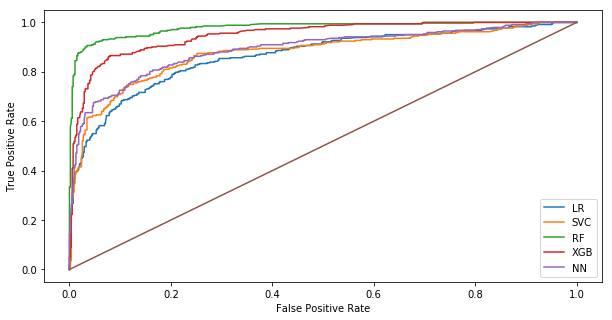

In [82]:
plt.figure(figsize=figsize)
plt.plot(fprLR, tprLR)
plt.plot(fprSVM, tprSVM)
plt.plot(fprRF, tprRF)
plt.plot(fprXGB, tprXGB)
plt.plot(fprNN, tprNN)
plt.legend(['LR','SVC','RF','XGB','NN'])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1])
# show the plot
plt.show()

## Stacking

In [85]:
X_l0 = pd.DataFrame({'LR': predsLR, 'SVM': predsSVM, 'RF': predsRF, 'XGB': predsXGB, 'NN': predsNN})

In [86]:
X_l0.head()

,LR,NN,RF,SVM,XGB
0,0,0,0,0,0
1,1,1,1,1,1
2,1,0,0,1,0
3,1,1,1,1,1
4,0,0,0,0,0


### RF on L1

In [87]:
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X_l0, y)):
    print('Fold:', i)
    X_train, X_test = X_l0.iloc[train_idx], X_l0.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    modelRF_l1 = RandomForestClassifier(random_state=0)
    
    modelRF_l1.fit(X_train, y_train)
    preds = modelRF_l1.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    accs.append(acc)
    f1s.append(f1)
    print('Acc:', acc, 'F1:', f1)
    print()
print('Mean acc:', np.mean(accs))
print('Mean F1:', np.mean(f1s))

Fold: 0
Acc: 0.9555555555555556 F1: 0.9411764705882354

Fold: 1
Acc: 0.9325842696629213 F1: 0.9032258064516129

Fold: 2
Acc: 0.9438202247191011 F1: 0.9206349206349206

Fold: 3
Acc: 0.9775280898876404 F1: 0.9696969696969697

Fold: 4
Acc: 0.9101123595505618 F1: 0.8787878787878787

Fold: 5
Acc: 0.9662921348314607 F1: 0.955223880597015

Fold: 6
Acc: 0.9438202247191011 F1: 0.923076923076923

Fold: 7
Acc: 0.9887640449438202 F1: 0.9850746268656716

Fold: 8
Acc: 0.9101123595505618 F1: 0.8666666666666666

Fold: 9
Acc: 0.8202247191011236 F1: 0.7647058823529412

Mean acc: 0.9348813982521846
Mean F1: 0.9108270025718836


#### Grid search on RF (L1)

In [89]:
from sklearn.model_selection import GridSearchCV

In [98]:
params = {
    'n_estimators': list(range(150,250,10)),
    'max_depth': list(range(5, 20, 5)),
    'max_features': [2, 3, 4, 5],
    'max_leaf_nodes': list(range(5, 20, 5))
}

In [97]:
modelRF_l1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 2,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [99]:
gridRF = GridSearchCV(modelRF_l1, param_grid=params, scoring='accuracy', cv=10)
gridRF.fit(X_l0, y)
print(gridRF.best_params_)

{'n_estimators': 150, 'max_features': 2, 'max_leaf_nodes': 5, 'max_depth': 5}


In [100]:
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X_l0, y)):
    print('Fold:', i)
    X_train, X_test = X_l0.iloc[train_idx], X_l0.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    modelRF_l1 = RandomForestClassifier(random_state=0, 
                                        n_estimators=150, 
                                        max_depth=5, 
                                        max_features=2, 
                                        max_leaf_nodes=5)
    
    modelRF_l1.fit(X_train, y_train)
    preds = modelRF_l1.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    accs.append(acc)
    f1s.append(f1)
    print('Acc:', acc, 'F1:', f1)
    print()
print('Mean acc:', np.mean(accs))
print('Mean F1:', np.mean(f1s))

Fold: 0
Acc: 0.9555555555555556 F1: 0.9411764705882354

Fold: 1
Acc: 0.9325842696629213 F1: 0.9032258064516129

Fold: 2
Acc: 0.9550561797752809 F1: 0.9375

Fold: 3
Acc: 0.9775280898876404 F1: 0.9696969696969697

Fold: 4
Acc: 0.9438202247191011 F1: 0.923076923076923

Fold: 5
Acc: 0.9662921348314607 F1: 0.955223880597015

Fold: 6
Acc: 0.9550561797752809 F1: 0.9375

Fold: 7
Acc: 0.9887640449438202 F1: 0.9850746268656716

Fold: 8
Acc: 0.9101123595505618 F1: 0.8666666666666666

Fold: 9
Acc: 0.8202247191011236 F1: 0.7647058823529412

Mean acc: 0.9404993757802746
Mean F1: 0.9183847226296036


### XGBoost on L1

In [101]:
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X_l0, y)):
    print('Fold:', i)
    X_train, X_test = X_l0.iloc[train_idx], X_l0.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    modelXGB_l1 = XGBClassifier(random_state=0)
    
    modelXGB_l1.fit(X_train, y_train)
    preds = modelXGB_l1.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    accs.append(acc)
    f1s.append(f1)
    print('Acc:', acc, 'F1:', f1)
    print()
print('Mean acc:', np.mean(accs))
print('Mean F1:', np.mean(f1s))

Fold: 0
Acc: 0.9444444444444444 F1: 0.9275362318840579

Fold: 1
Acc: 0.9325842696629213 F1: 0.9032258064516129

Fold: 2
Acc: 0.9438202247191011 F1: 0.9206349206349206

Fold: 3
Acc: 0.9775280898876404 F1: 0.9696969696969697

Fold: 4
Acc: 0.9101123595505618 F1: 0.8787878787878787

Fold: 5
Acc: 0.9662921348314607 F1: 0.955223880597015

Fold: 6
Acc: 0.9438202247191011 F1: 0.923076923076923

Fold: 7
Acc: 0.9887640449438202 F1: 0.9850746268656716

Fold: 8
Acc: 0.9101123595505618 F1: 0.8666666666666666

Fold: 9
Acc: 0.8202247191011236 F1: 0.7647058823529412

Mean acc: 0.9337702871410736
Mean F1: 0.9094629787014659


#### Grid search for XGB on L1

In [103]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'n_estimators': [100, 200, 250],
        'max_depth': [4, 6, 10, 15]
        }

In [104]:
gridXGB = GridSearchCV(modelXGB_l1, param_grid=params, scoring='accuracy', cv=10)
gridXGB.fit(X_l0, y)
print(gridXGB.best_params_)

{'gamma': 0, 'colsample_bytree': 0.6, 'n_estimators': 100, 'subsample': 0.6, 'max_depth': 4, 'min_child_weight': 5}


In [105]:
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X_l0, y)):
    print('Fold:', i)
    X_train, X_test = X_l0.iloc[train_idx], X_l0.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    modelXGB_l1 = XGBClassifier(random_state=0,
                                gamma=0,
                                colsample_bytree=0.6,
                                n_estimators=100,
                                subsample=0.6,
                                max_depth=4,
                                min_child_weight=5
                               )
    
    modelXGB_l1.fit(X_train, y_train)
    preds = modelXGB_l1.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    accs.append(acc)
    f1s.append(f1)
    print('Acc:', acc, 'F1:', f1)
    print()
print('Mean acc:', np.mean(accs))
print('Mean F1:', np.mean(f1s))

Fold: 0
Acc: 0.9555555555555556 F1: 0.9411764705882354

Fold: 1
Acc: 0.9325842696629213 F1: 0.9032258064516129

Fold: 2
Acc: 0.9550561797752809 F1: 0.9375

Fold: 3
Acc: 0.9775280898876404 F1: 0.9696969696969697

Fold: 4
Acc: 0.9438202247191011 F1: 0.923076923076923

Fold: 5
Acc: 0.9662921348314607 F1: 0.955223880597015

Fold: 6
Acc: 0.9550561797752809 F1: 0.9375

Fold: 7
Acc: 0.9887640449438202 F1: 0.9850746268656716

Fold: 8
Acc: 0.9101123595505618 F1: 0.8666666666666666

Fold: 9
Acc: 0.8202247191011236 F1: 0.7647058823529412

Mean acc: 0.9404993757802746
Mean F1: 0.9183847226296036


In [106]:
# Mean acc: 0.9404993757802746
# Mean F1: 0.9183847226296036
    
# Mean acc: 0.9404993757802746
# Mean F1: 0.9183847226296036

#### how did they achieve the same acc?

# PART II. TEST SET

In [107]:
titanic_test = pd.read_csv('datasets/titanic/test.csv')

In [109]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
ids = titanic_test['PassengerId']

In [111]:
mv_cols = (titanic_test.isnull().sum())
print(mv_cols[mv_cols > 0])

Age       86
Fare       1
Cabin    327
dtype: int64


## Feature stage

In [112]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Missing vals imputation

In [114]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].median())

In [115]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].median())
titanic_test['Cabin'] = titanic_test['Cabin'].fillna('NA')

In [116]:
mv_cols = (titanic_test.isnull().sum())
print(mv_cols[mv_cols > 0])

Series([], dtype: int64)


### Feat engineering

In [118]:
titanic_test['Has_cabin'] = titanic_test['Cabin'].apply(lambda x: 0 if x == 'NA' else 1)
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch'] + 1
titanic_test['Is_alone'] = titanic_test['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

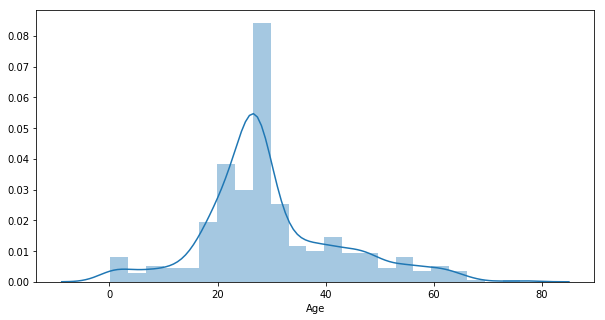

In [120]:
plt.figure(figsize=figsize)
sns.distplot(titanic_test['Age'])
plt.show()

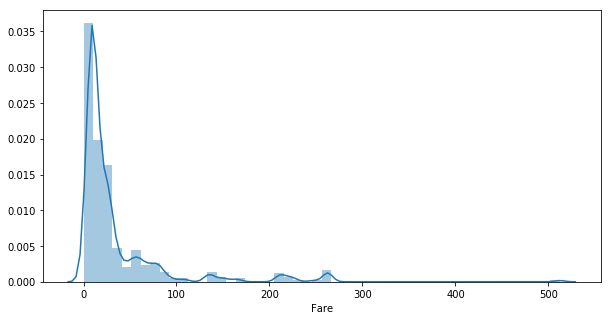

In [121]:
plt.figure(figsize=figsize)
sns.distplot(titanic_test['Fare'])
plt.show()

In [122]:
titanic_test['Age_scaled'] = ageScaler.transform(titanic_test['Age'].values.reshape(-1, 1))
titanic_test['Fare_scaled'] = fareScaler.transform(titanic_test['Fare'].values.reshape(-1, 1))

In [125]:
titanic_test.drop(unnecessary_cols, inplace=True, axis=1)

In [127]:
titanic_test = pd.get_dummies(titanic_test)

In [128]:
titanic_test.head()

,Pclass,Has_cabin,FamilySize,Is_alone,Age_scaled,Fare_scaled,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,1,0.500000,-0.802204,0,1,0,1,0
1,3,0,2,0,1.461538,-0.913735,1,0,0,0,1
2,2,0,1,1,2.615385,-0.589230,0,1,0,1,0
3,3,0,1,1,-0.076923,-0.701150,0,1,0,0,1
4,3,0,3,0,-0.461538,-0.351245,1,0,0,0,1


## Prediction on L0

In [129]:
predsLR = modelLR.predict(titanic_test)
predsSVM = modelSVM.predict(titanic_test)
predsRF = modelRF.predict(titanic_test)
predsXGB = modelXGB.predict(titanic_test)

In [130]:
probs = modelNN.predict(titanic_test)
predsNN = [1 if proba >= 0.5 else 0 for proba in probs]

In [131]:
testset_l0 = pd.DataFrame({'LR': predsLR, 'SVM': predsSVM, 'RF': predsRF, 'XGB': predsXGB, 'NN': predsNN})

In [132]:
testset_l0.head()

,LR,NN,RF,SVM,XGB
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,1,1,0


## Prediction on L1

In [133]:
finalPredsRF = modelRF_l1.predict(testset_l0)
finalPredsXGB = modelXGB_l1.predict(testset_l0)

In [134]:
finalPredsRF[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [135]:
finalPredsXGB[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

## Prepare for submission

In [139]:
output = pd.DataFrame({'PassengerId': ids, 'Survived': finalPredsRF})
output.to_csv('results/titanic_stacking_RF.csv', index=False)

In [140]:
output = pd.DataFrame({'PassengerId': ids, 'Survived': finalPredsXGB})
output.to_csv('results/titanic_stacking_XGB.csv', index=False)

In [141]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# At this point you're ready to submit to Kaggle!

### Final score was 0.7751, i.e. we're overfitting the test set!